##ЛР1. Pandas, EDA, линейная регрессия

[8 + 5 бонусных баллов]

## О формате сдачи (все ЛР)

🔷 **<font color='plum'>При решении используйте данный шаблон</font>**

    ✅ Можно добавлять новые ячейки любых типов
    ❌ Не нужно удалять текстовые ячейки c разметкой частей ноутбука и формулировками заданий


🔷 **<font color='plum'>При оценивании задач учитывается код</font>**

    ✅ Задания, в которых необходим код, могут помечаться фразами "Your code here"/"Ваш код" и аналогичными
    ❌ Ответы на вопросы без сопутствующего кода оцениваются в 0 баллов
    ❌ Наличие работоспособного кода в ноутбуке, если на сказано иного, обязательно

🔷 **<font color='plum'>При оценивании задач учитываются выводы</font>**

    ✅ Задания, в которых необходимы выводы, могут помечаться фразами "Вывод"/"Ответ на вопрос"/"Ваш текст" и аналогичными
    ✅ Выводы подразумевают текстовый (письменный, не устный) ответ (можно писать markdown, latex).
    ✅ Сопутствующие изображения, графики, таблички - приветствуются!
    ❌ При отсутствии выводов задание не засчитается на полный балл

🔷 **<font color='plum'>Устная защита</font>**

    ❌❌❌ Если не пройдена устная защита по ЛР, то баллы не начисляются вовсе
    (вопросы устной защиты охватывают лекционный материал и практический материал по заданиям ЛР, список вопросов не публикуется)

## Этапы

<font color='DarkOrange'>**Задание 1 [баллов: 4]:**</font>

Выберите датасет и задачу для него (регрессия) - с Kaggle или UCI Machine Learning Repository (https://archive.ics.uci.edu/datasets).
Важно: используйте более новые датасеты, кол-во объектов не менее 100

Выполните EDA.
Придумайте вопросы к данным, которые потребуют использования следующих инструментов (напишите каждый вопрос и код к нему) [<font color='DarkOrange'>0,5 балла за покрытие каждого пункта</font>]:
- группировка с агрегацией (groupby),
- изменение дискретности по времени (resample),
- объединение датафреймов (merge,join или concat),
- статическая визуализация seaborn,
- интерактивный график plotly,
- визуализация распределений (гистограмма относительных частот, kde, boxplot, violinplot, scatter),
- тесты на свойства распределения (например, нормальность),
- One Hot Encoding для категориальных признаков (если их нет, то придумайте как некие классы, определяемые по другим числовым признакам)  

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import SelectKBest, f_regression
import warnings
import nbformat
warnings.filterwarnings('ignore')

# Загрузка данных
df = pd.read_csv('/home/destiny/ITMO/СИИ/lab1/student_habits_performance.csv')
print(f"Размер данных: {df.shape}")
df.columns

Размер данных: (1000, 16)


Index(['student_id', 'age', 'gender', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 'part_time_job',
       'attendance_percentage', 'sleep_hours', 'diet_quality',
       'exercise_frequency', 'parental_education_level', 'internet_quality',
       'mental_health_rating', 'extracurricular_participation', 'exam_score'],
      dtype='object')

# группировка с агрегацией (groupby),

- Вопрос: Как средняя exam_score зависит от study_hours_per_day и social_media_hours?


In [3]:
exam_score_by_study_hours = df.groupby(['study_hours_per_day']).agg({
    'exam_score': ['mean', 'median', 'std', 'count'],
}).round(2).sort_values(by=('exam_score', 'mean'), ascending=False)

print("Средняя exam_score по study_hours_per_day")
print(exam_score_by_study_hours)


Средняя exam_score по study_hours_per_day
                    exam_score                    
                          mean  median   std count
study_hours_per_day                               
7.3                     100.00  100.00   NaN     1
7.5                     100.00  100.00   NaN     1
8.2                     100.00  100.00   NaN     1
7.6                     100.00  100.00   NaN     1
6.9                     100.00  100.00   NaN     1
...                        ...     ...   ...   ...
0.5                      39.52   41.45  6.74     4
0.3                      32.62   33.80  4.04     4
0.2                      31.50   31.50   NaN     1
0.9                      29.53   27.60  7.59     3
0.6                      18.40   18.40   NaN     1

[78 rows x 4 columns]


# изменение дискретности по времени (resample),
- how are the grades of exam scores grouped?

In [12]:
# Creating bins based on exam_score ranges since there is no time data
bins = [0,60,70,80,85,90,101]  
labels = ['F','E','D', 'C', 'B','A']  

df['score_bin'] = pd.cut(df['exam_score'], bins=bins, labels=labels, right=False)

print(df.groupby('score_bin').size())  

score_bin
F    280
E    209
D    234
C     89
B     62
A    126
dtype: int64


# объединение датафреймов (merge,join или concat),


# статическая визуализация seaborn,


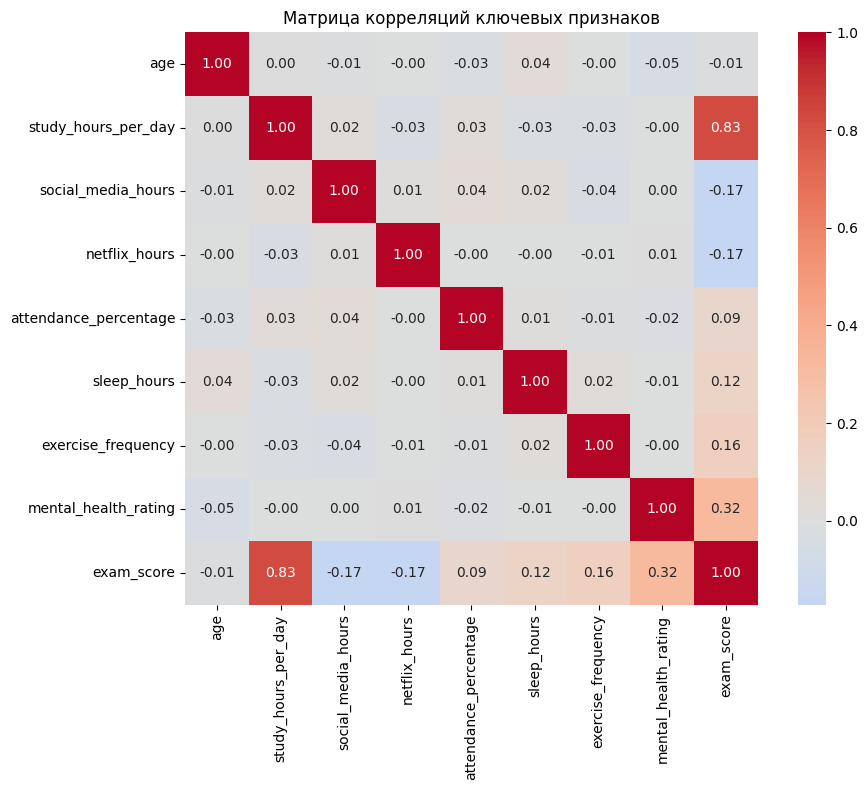

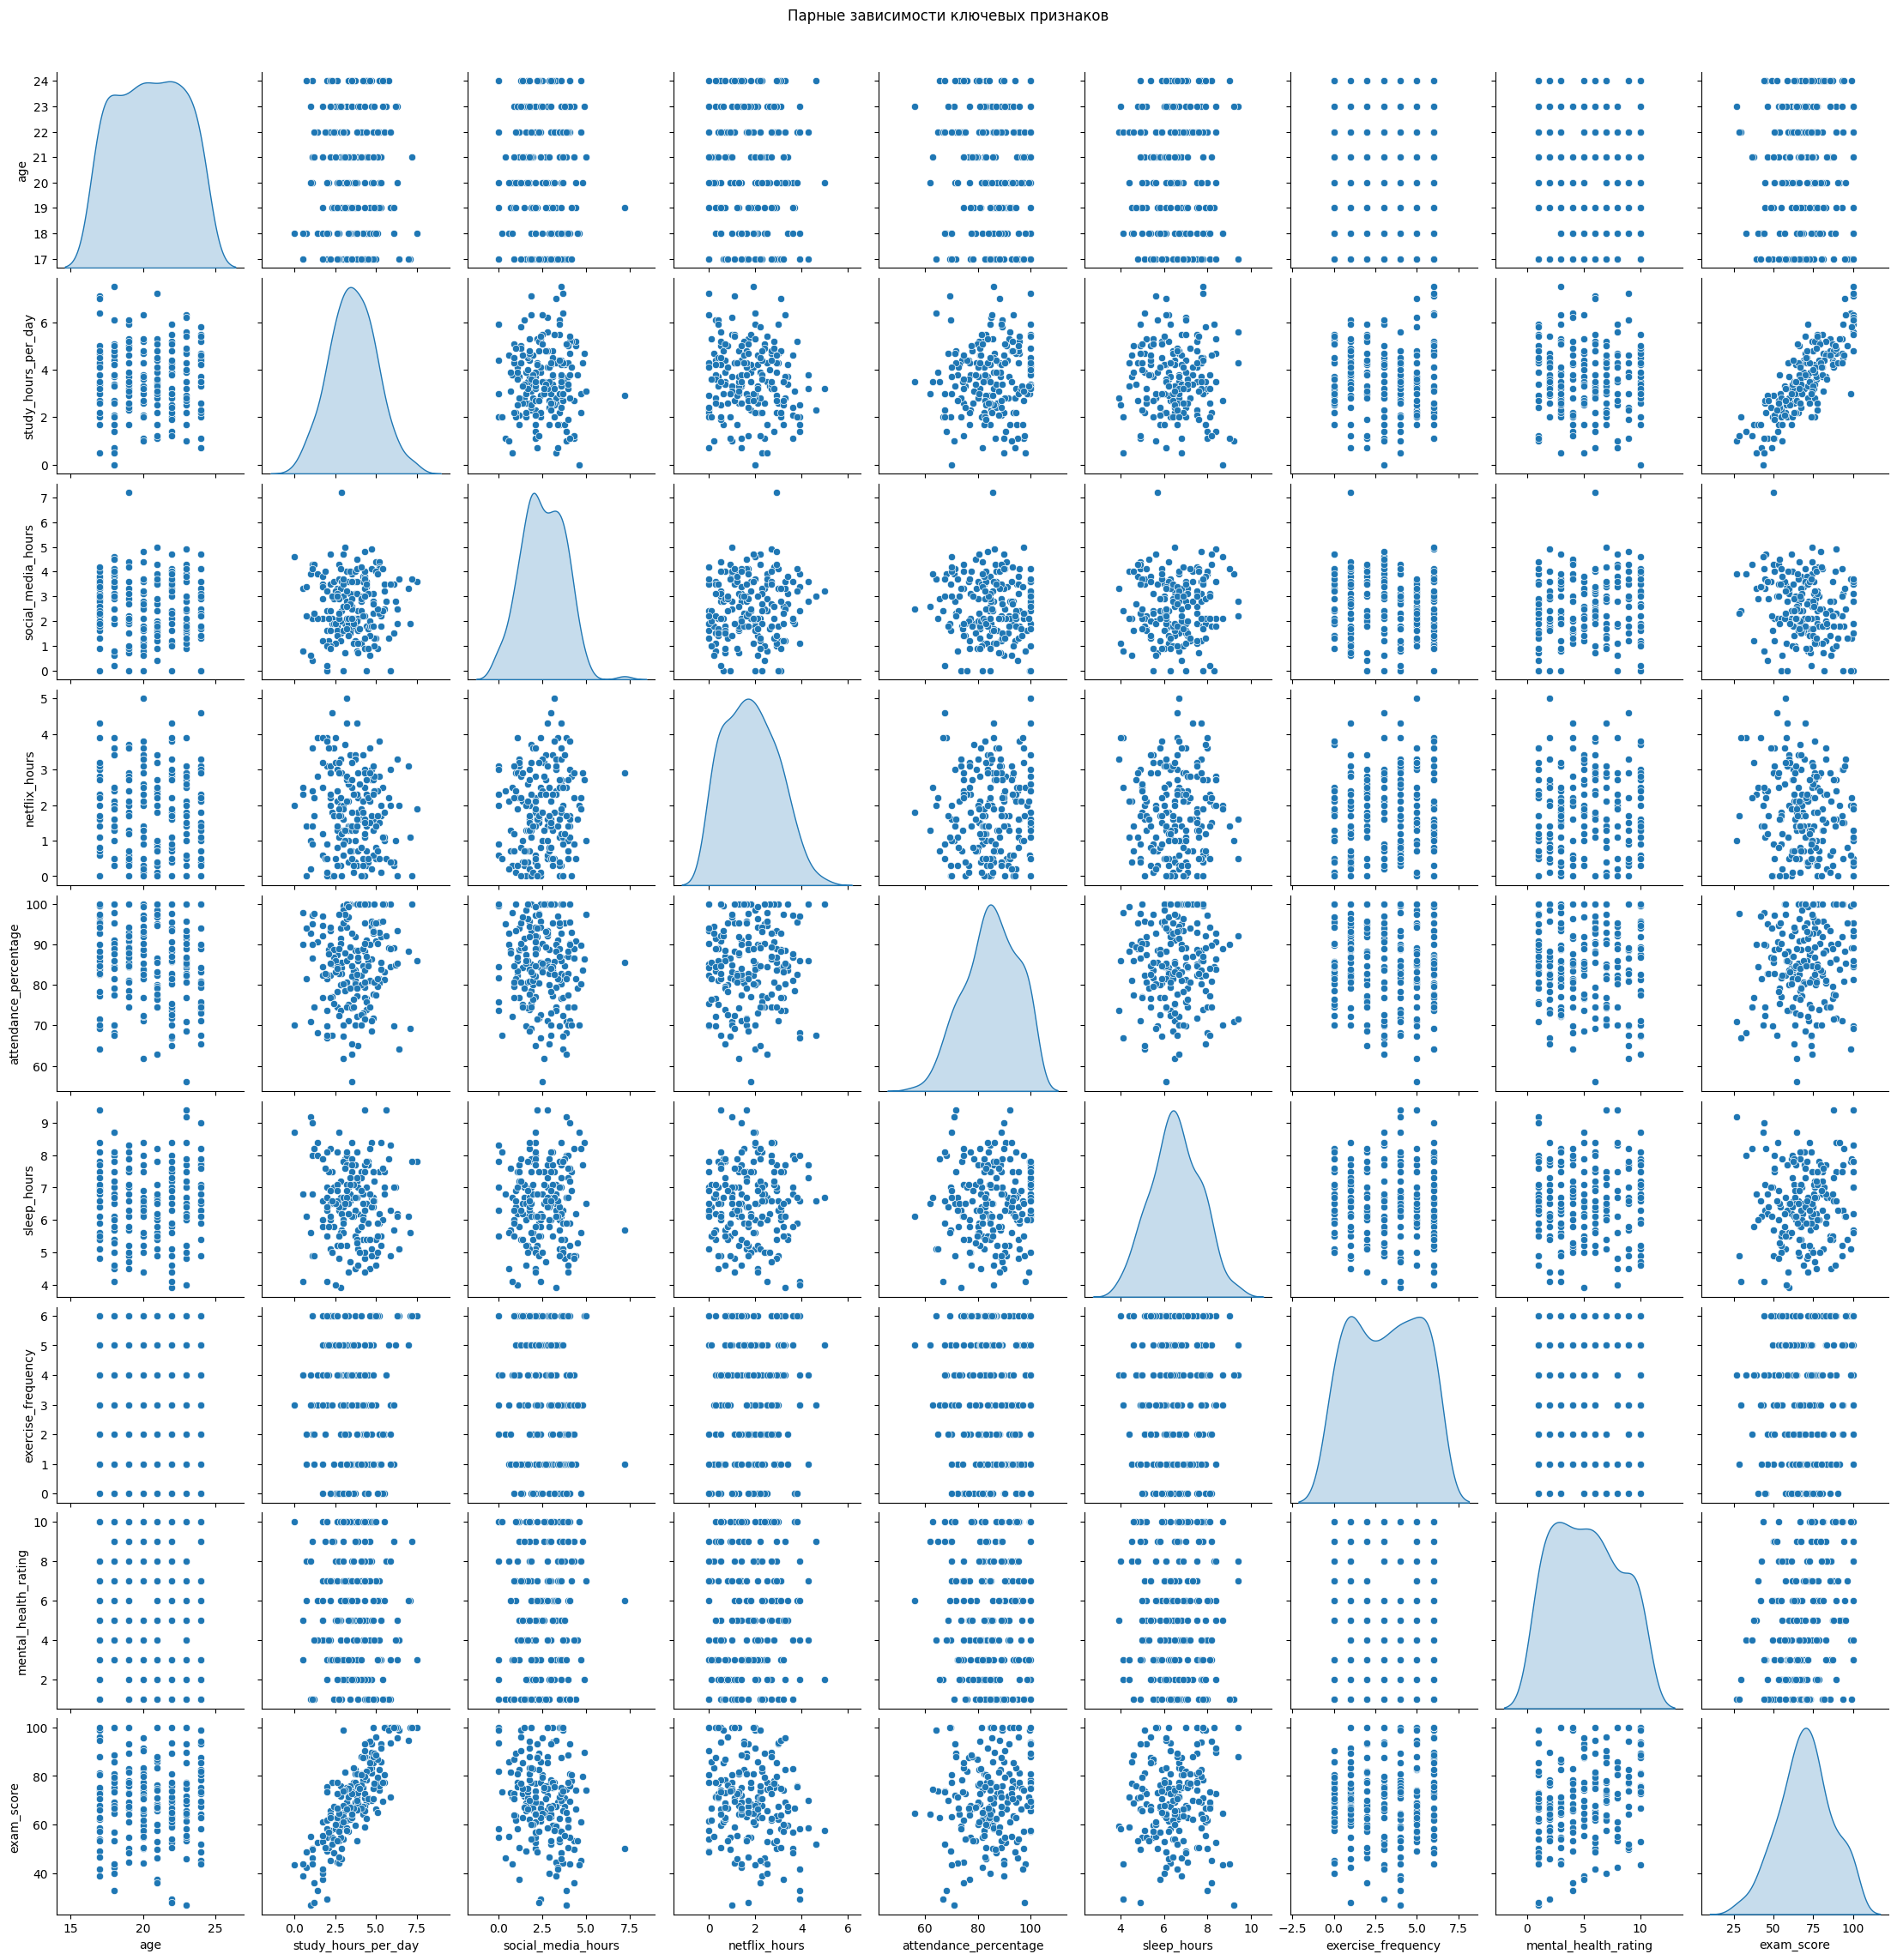

In [5]:
# Выбираем ключевые числовые признаки для анализа
key_features = ['age', 'study_hours_per_day',
       'social_media_hours', 'netflix_hours', 
       'attendance_percentage', 'sleep_hours',
       'exercise_frequency',
       'mental_health_rating', 'exam_score']

# Матрица корреляций
plt.figure(figsize=(10, 8))
correlation_matrix = df[key_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f')
plt.title('Матрица корреляций ключевых признаков')
plt.tight_layout()
plt.show()

# Парные зависимости
sns.pairplot(df[key_features].sample(200), diag_kind='kde')
plt.suptitle('Парные зависимости ключевых признаков', y=1.02)
plt.show()

# интерактивный график plotly,


In [ ]:
# Интерактивный scatter plot
fig = px.scatter(df, x='sleep_hours', y='exam_score', 
                 color='netflix_hours', size='study_hours_per_day',
                 hover_data=['parental_education_level', 'internet_quality'],
                 title='Зависимость exam_score от sleep_hours',
                 labels={'sleep_hours': 'Часы сна', 
                        'exam_score': 'Баллы экзамена',})
fig.show()

# визуализация распределений (гистограмма относительных частот, kde, boxplot, violinplot, scatter),


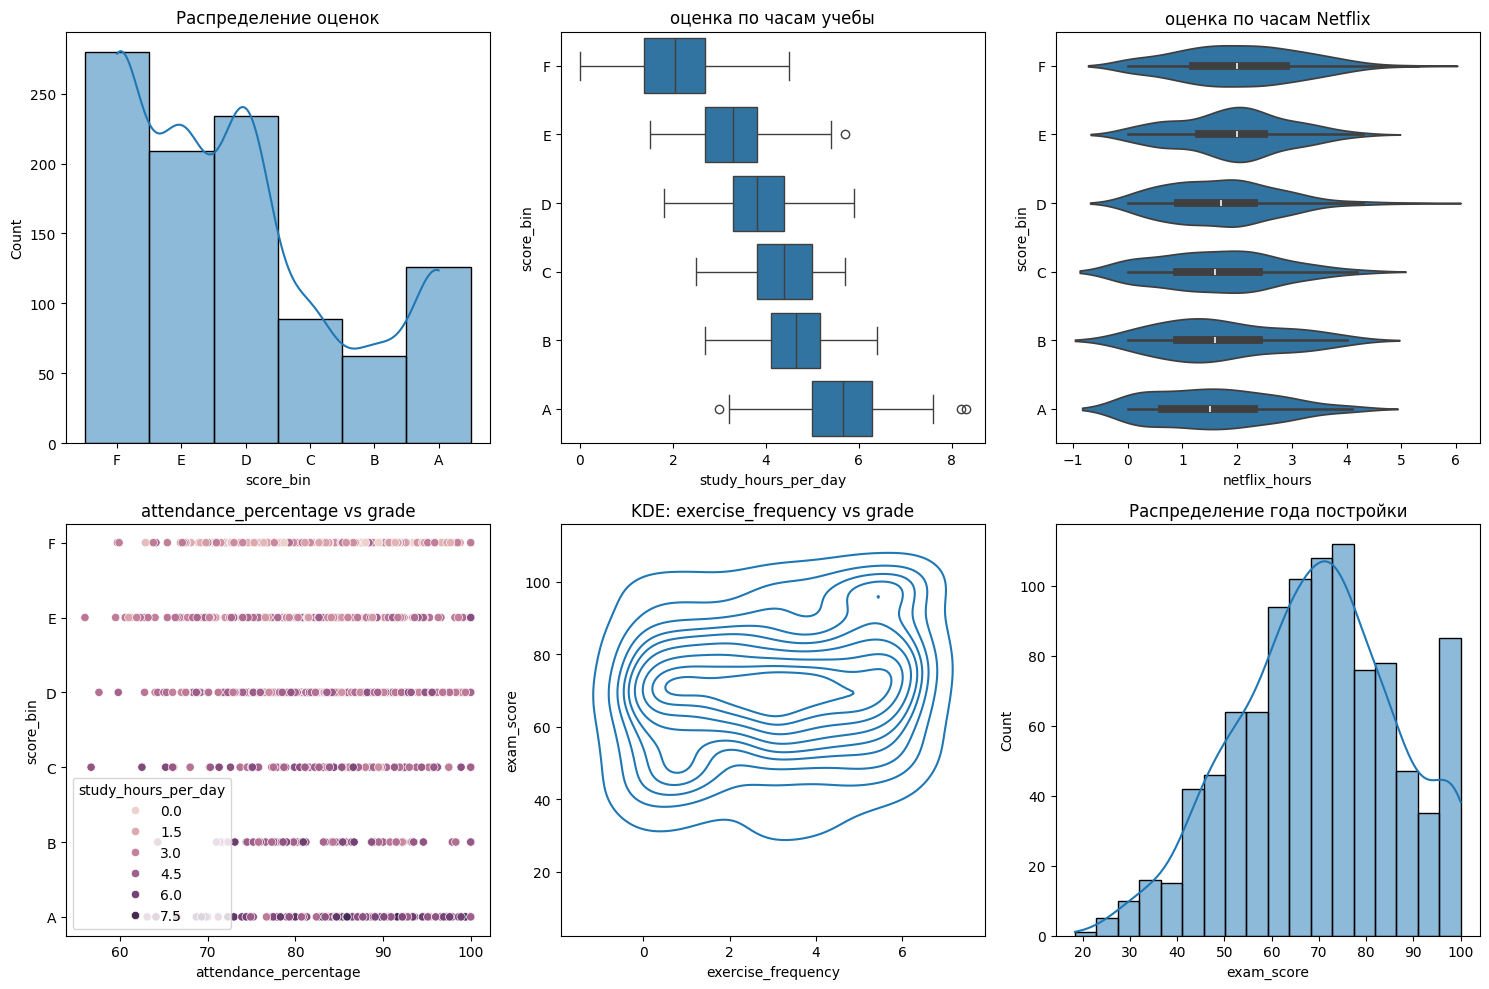

In [20]:
# Создаем grid для визуализации
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Гистограмма с KDE
sns.histplot(df['score_bin'], kde=True, ax=axes[0,0])
axes[0,0].set_title('Распределение оценок')

# Boxplot по качеству
sns.boxplot(data=df, x='study_hours_per_day', y='score_bin', ax=axes[0,1])
axes[0,1].set_title('оценка по часам учебы')

# Violin plot
sns.violinplot(data=df, x='netflix_hours', y='score_bin', ax=axes[0,2])
axes[0,2].set_title('оценка по часам Netflix')

# Scatter plot
sns.scatterplot(data=df, x='attendance_percentage', y='score_bin', hue='study_hours_per_day', ax=axes[1,0])
axes[1,0].set_title('attendance_percentage vs grade')

# KDE plot
sns.kdeplot(data=df, x='exercise_frequency', y='exam_score', ax=axes[1,1])
axes[1,1].set_title('KDE: exercise_frequency vs grade')

# Распределение года постройки
sns.histplot(df['exam_score'], kde=True, ax=axes[1,2])
axes[1,2].set_title('Распределение года постройки')

plt.tight_layout()
plt.show()

# тесты на свойства распределения (например, нормальность),
- Вопрос: Нормально ли распределены EXAM_SCORE?

In [22]:
from scipy.stats import shapiro, normaltest
# Тесты на нормальность
stat, p = shapiro(df['exam_score'])
print(f'Shapiro-Wilk Test: Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('Данные распределены нормально (не отвергаем H0)')
else:
    print('Данные не распределены нормально (отвергаем H0)')
# Тест Д'Агостино
stat, p = normaltest(df['exam_score'])
print(f'D\'Agostino Test: Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print('Данные распределены нормально (не отвергаем H0)')
else:
    print('Данные не распределены нормально (отвергаем H0)')

Shapiro-Wilk Test: Statistics=0.987, p=0.000
Данные не распределены нормально (отвергаем H0)
D'Agostino Test: Statistics=15.686, p=0.000
Данные не распределены нормально (отвергаем H0)


# One Hot Encoding для категориальных признаков (если их нет, то придумайте как некие классы, определяемые по другим числовым признакам)  

In [31]:
gender_map = {'Male': 0, 'Female': 1}
diet_quality_map = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3}
internet_quality_map = {'Poor': 0, 'Average': 1, 'Good': 2, 'Excellent': 3}
parental_education_map = {'High School': 0,'Bachelor': 2, 'Master': 3, 'Doctorate': 4,'NaN':0}
extra_activity_map = {'No': 0, 'Yes': 1}
part_time_job_map = {'No': 0, 'Yes': 1}

df_encoded = df.copy()
df_encoded['gender_map'] = df_encoded['gender'].map(gender_map)
df_encoded['diet_quality_map'] = df_encoded['diet_quality'].map(diet_quality_map)
df_encoded['internet_quality_map'] = df_encoded['internet_quality'].map(internet_quality_map)
df_encoded['parental_education_map'] = df_encoded['parental_education_level'].map(parental_education_map)
df_encoded['extra_activity_map'] = df_encoded['extracurricular_participation'].map(extra_activity_map)
df_encoded['part_time_job_map'] = df_encoded['part_time_job'].map(part_time_job_map)
df_encoded.head(20)


,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,...,mental_health_rating,extracurricular_participation,exam_score,score_bin,gender_map,diet_quality_map,internet_quality_map,parental_education_map,extra_activity_map,part_time_job_map
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,...,8,Yes,56.2,F,1.0,1,1,3.0,1,0
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,...,8,No,100.0,A,1.0,2,1,0.0,0,0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,...,1,No,34.3,F,0.0,0,0,0.0,0,0
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,...,1,Yes,26.8,F,1.0,0,2,3.0,1,0
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,...,1,No,66.4,E,1.0,1,2,3.0,0,0
5,S1005,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,...,4,No,100.0,A,0.0,1,1,3.0,0,0
6,S1006,21,Female,5.6,1.5,1.4,Yes,85.8,6.5,Good,...,4,No,89.8,B,1.0,2,0,3.0,0,1
7,S1007,21,Female,4.3,1.0,2.0,Yes,77.7,4.6,Fair,...,8,No,72.6,D,1.0,1,1,2.0,0,1
8,S1008,23,Female,4.4,2.2,1.7,No,100.0,7.1,Good,...,1,No,78.9,D,1.0,2,2,2.0,0,0
9,S1009,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,...,10,Yes,100.0,A,1.0,2,2,2.0,1,0


<font color='DarkOrange'>**Задание 2 [баллов: 4]:**</font>

1.Выберите один из признаков как таргет (регрессант, предиктант), также выберите некоторе число признаков в качестве регрессоров (предикторов). Обоснуйте, что эти признаки имеет смысл использовать как регрессоры, исходя из предметной области (природы датасета), проведите аналитику - представьте код и рисунки. [<font color='DarkOrange'>1 балл</font>]

<font color='DarkOrange'>Важно! </font> Если выполняете исследование данных до разделения на обучающую, которая нужна для моделирования, и отложенную выборки (тестовую), то это потенциал для утечек (data leakage)! Следует сразу отделить часть данных, исследовать их только перед прогоном на уже обученной готовой модели!

2.Обучите линейную регрессионную модель без регуляризации. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>1 балл</font>]

3.Обучите линейную регрессионную модель с регуляризацией (любой). Для предобработки осуществите удаление выбросов и нормирование - запишите обоснование для выбора способа поиска выбросов и нормирования. Используйте для этапов Pipeline из sklearn. Проиллюстрируйте процесс обучения и тестирования модели, запишите выводы о качестве. Метрики: RMSE, MAE, $R^{2}$ [<font color='DarkOrange'>2 балла</font>]

<font color='MediumSeaGreen'>**Задание 3 [баллов: 2] - бонусные баллы:**</font>

По итогам лекции №1 ответьте на вопросы о месте искусственного интеллекта среди инноваций в крупной компании (пример "Норильского никеля" - см видео в группе в ТГ).

1.Какие задачи моделирования и управления решаются?

2.Какие разделы/формальные задачи ИИ задействованы?

3.Какие физико-химические признаки для них используются?

4.Укажите (предположите) для нескольких признаков: числовые или категориальные, временная и пространственная дискретность регистрации, сырой признак или агрегат по нескольким, сильно зашумленный, много ли пропусков, особенности закона распределения, потенциал для data leakage


<font color='MediumSeaGreen'>**Задание 4 [баллов: 3] - бонусные баллы:**</font>

Покажите, что из максимизации правдоподобия выборки невязок, распределенных по нормальному закону, следует задача минимизации ошибки MSE, вычисленной по этим невязкам.

Обоснование принесет вам 2 балла.
Если выполните не на листе бумаги, а заполните ячейку (математические символы), то получите ещё 1 балл. Пример текста с математикой ниже

<font color='MediumSeaGreen'>***Пример текста***</font>

Из курса математического анализы мы знаем, что тригонометрические функции можно также применять к матрицам. Чтобы найти $sin(X)$, где $X \in \mathbb{R}^{n\times n}$ – матрица с $n$ строками и $n$ столбцами, достаточно разложить функцию синус в ряд Тейлора:

$sin(x) = \sum_{i=1}^{\infty} a_i(x) = x - \frac{x^3}{3!} + \frac{x^5}{5!} - \frac{x^7}{7!}+\dots$

И вместо $x$ подставить матрицу $X$:

$sin(X) = X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+\dots$

Тогда $sin(X)$ – тоже матрица!

Ограничимся 15 степенью, то есть:
$sin(X) \approx X - \frac{X^3}{3!} + \frac{X^5}{5!} - \frac{X^7}{7!}+ \dots - \frac{X^{15}}{15!}$